In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 25 mT with a rate of 0.0125 mT/s (2000 s) and then mantaining the magnetic field constant (25 mT). Then, we are analyzing the output data of Script-8.1.
    


In [2]:
rate = 25/2000

In [3]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp8.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp1.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp3.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp4.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp2.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp7.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp9.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp6.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp5.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      0       0.000000   -9.772898             3      -3  0.000000   
           1       0.000000    9.772898             3       3  0.000000   
           2       0.000000 -473.292807             3      -1 -1.732051   
           3      23.174375 -486.690558             4       0 -2.732051   
           4       0.000000 -453.747202             3      -1  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1232   92.704002 -639.155048             3      -1  1.732051   
           1233  658.700809 -602.575989             3       1  1.000000   
           1234  639.155115 -602.575989             3      -1  1.000000   
           1235  639.155315 -509.872009             3      -1 -2.000000   
           1236  658.700703 -509.872009             3      -1 -1.000000   

                           dy  
Exp frame  id                  
0   0      0    -3.747952e-07  
           1    -3.747952e-07  
           2     1.000000e+00  
           3    -7.320502e-01  
           4     2.000000e+00  
...                       ...  
9   250000 1232 -1.000000e+00  
           1233  1.732051e+00  
           1234 -1.732051e+00  
           1235  0.000000e+00  
           1236  1.732051e+00  

[3104870 rows x 6 columns]

In [8]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [9]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [10]:
Cairo_exp['field'] = Cairo_exp.index.get_level_values('frame')
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      0       0.000000   -9.772898             3      -3  0.000000   
           1       0.000000    9.772898             3       3  0.000000   
           2       0.000000 -473.292807             3      -1 -1.732051   
           3      23.174375 -486.690558             4       0 -2.732051   
           4       0.000000 -453.747202             3      -1  0.000000   
...                     ...         ...           ...     ...       ...   
9   250000 1232   92.704002 -639.155048             3      -1  1.732051   
           1233  658.700809 -602.575989             3       1  1.000000   
           1234  639.155115 -602.575989             3      -1  1.000000   
           1235  639.155315 -509.872009             3      -1 -2.000000   
           1236  658.700703 -509.872009             3      -1 -1.000000   

                           dy    type  mean   field  
Exp frame  id                                        
0   0      0    -3.747952e-07  Q = -3     0       0  
           1    -3.747952e-07  Q = +3     0       0  
           2     1.000000e+00  Q = -1     0       0  
           3    -7.320502e-01   Q = 0     0       0  
           4     2.000000e+00  Q = -1     0       0  
...                       ...     ...   ...     ...  
9   250000 1232 -1.000000e+00  Q = -1     0  250000  
           1233  1.732051e+00  Q = +1     0  250000  
           1234 -1.732051e+00  Q = -1     0  250000  
           1235  0.000000e+00  Q = -1     0  250000  
           1236  1.732051e+00  Q = -1     0  250000  

[3104870 rows x 9 columns]

In [11]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
count_m

coordination  field   mean
Exp field  coordination type                              
0   0      2            Q = +1           0.0    0.0    0.0
                        Q = +2           0.0    0.0   19.0
                        Q = +3           0.0    0.0    0.0
                        Q = +4           0.0    0.0    0.0
                        Q = -1           0.0    0.0    0.0
...                                      ...    ...    ...
9   250000 4            Q = -1           0.0    0.0    0.0
                        Q = -2           0.0    0.0    9.0
                        Q = -3           0.0    0.0    0.0
                        Q = -4           0.0    0.0    0.0
                        Q = 0            0.0    0.0  306.0

[67770 rows x 3 columns]

In [12]:
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [13]:
a = increase.query('mean != 0')
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field  type            
0   0      Q = +2  0.250000
           Q = -2  0.157895
           Q = +1  0.373750
           Q = +3  0.111250
           Q = -1  0.387500
...                     ...
9   250000 Q = -1  0.543750
           Q = +2  0.113573
           Q = +4  0.013850
           Q = -2  0.024931
           Q = 0   0.847645

[25094 rows x 1 columns]

In [14]:
v_counts_m = a.groupby(["field","type"]).mean()
v_counts_m["err"] = a.groupby(
    ["field","type"]).std()/np.sqrt(a.groupby(["field","type"]).count().values)

In [15]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

In [16]:
v_counts_m['time'] = v_counts_m.index.get_level_values('field')/100

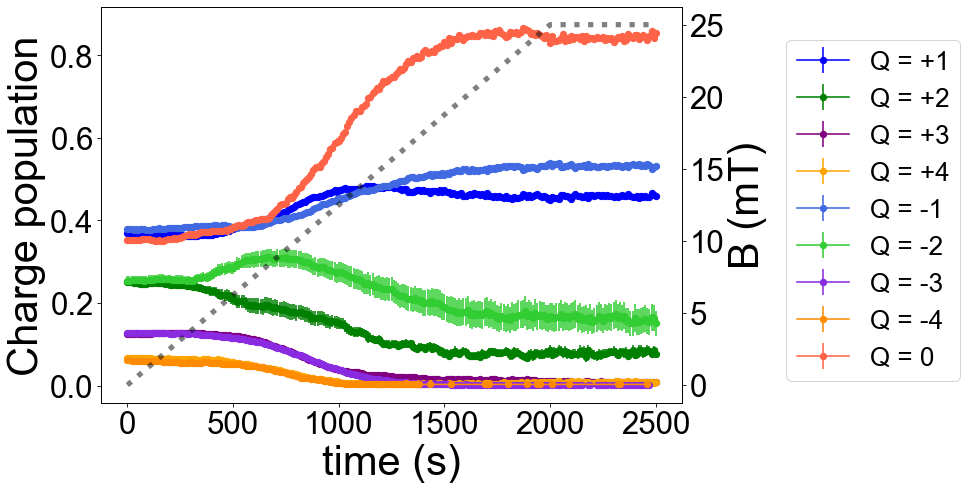

In [17]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

v_counts_m.to_csv('PeriodicBound.dat', sep = "\t")

plt.show()